# Finne anomalier

1.5
3.7
-1.8000000000000003
7.0
Anomalies in the 'Fakt' column:
        AOnr    Objektnr                            Objektnavn     Jobbomr.  \
5     730830  SP-418-100                           Bandemaskin  Vedlikehald   
19    731010  SP-423-020                           Homog.ovn 1  Vedlikehald   
30    731054  SP-422-005           Magasin mellom conti anlegg  Vedlikehald   
48    731131  EP-313-006        Bormaskin for tapperør. Almeq.  Vedlikehald   
65    731327  SP-422-015                       Chargeringsvogn  Vedlikehald   
...      ...         ...                                   ...          ...   
4007  791106  SP-415-030                    El./automasjon/PLS  Vedlikehald   
4026  791208  EP-450-006                      El.styring m/pls  Vedlikehald   
4062  792093  SP-804-000             Rennefilter B. sir felles        Drift   
4083  792589  KJ-733-005                Støvkasse / sugefilter  Vedlikehald   
4089  792728  AK-425-030  Magnetutskiller (installert seinere)  Ved

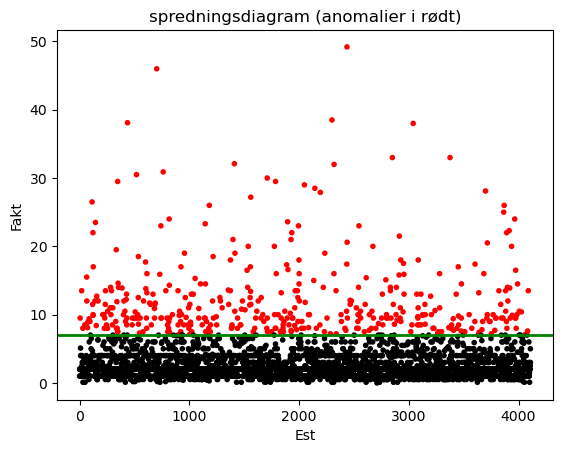

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your DataFrame
df = pd.read_excel('Datasett_vaktutkallingar.xlsx')

# Dropping NA values from the 'Fakt' column for calculation
df = df.dropna(subset=['Fakt'])

# drop NA values og verdier over 90
df = df[df['Fakt'] < 90].dropna(subset=['Fakt'])

# Calculate the IQR
Q1 = df['Fakt'].quantile(0.25)
Q3 = df['Fakt'].quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(Q3)

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

# Find anomalies in the 'Fakt' column
anomalies = df[(df['Fakt'] < lower_bound) | (df['Fakt'] > upper_bound)]

print("Anomalies in the 'Fakt' column:")
print(anomalies)

# Apply a function to determine the color of each point based on whether it is an outlier
colors = df['Fakt'].apply(lambda x: 'red' if (x < lower_bound) or (x > upper_bound) else 'black')

# Create scatter plot
plt.scatter(df.index, df['Fakt'], c=colors, marker=".")
plt.axhline(y=upper_bound, color='green', linewidth=2)

# Add labels and title
plt.xlabel('Est')
plt.ylabel('Fakt')
plt.title('spredningsdiagram (anomalier i rødt)')

# Show plot
plt.show()


## EKsempel på deskriptiv analyse

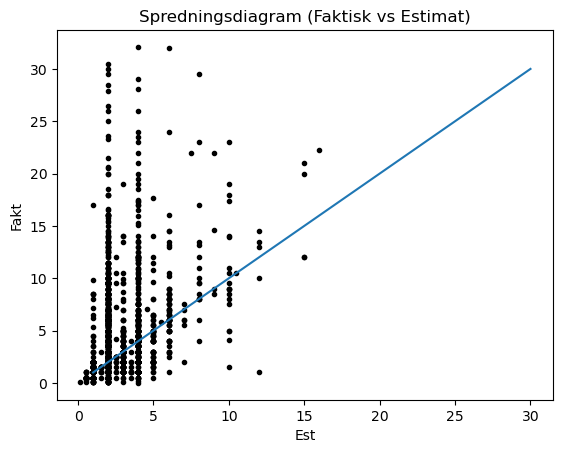

In [6]:

# Endrer litt på hvilket data jeg ønsker å ha med for å se variasjonene i dataen

temp_df = df[df['Fakt'] < 35].dropna(subset=['Fakt'])
temp_df = df[df['Est.'] < 20].dropna(subset=['Est.'])

# Create scatter plot
plt.scatter(temp_df['Est.'], temp_df['Fakt'], marker='.', color="black")
plt.plot([1,30], [1,30])

# Add labels and title
plt.xlabel('Est')
plt.ylabel('Fakt')
plt.title('Spredningsdiagram (Faktisk vs Estimat)')

# Show plot
plt.show()


# Faktisk som funksjon av tid


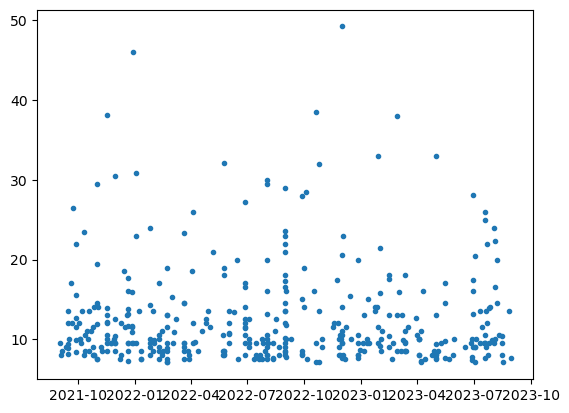

In [20]:
from sklearn.linear_model import LinearRegression
from matplotlib.dates import date2num

# Sørger for å konvertere til dato datatype
anomalies_copy = anomalies.copy()
anomalies_copy['Ferdig'] = pd.to_datetime(anomalies_copy['Ferdig'])
anomalies_sorted = anomalies_copy.sort_values(by='Ferdig')


plt.scatter(anomalies_sorted['Ferdig'], anomalies_sorted['Fakt'], marker='.')

# Linear regresjon

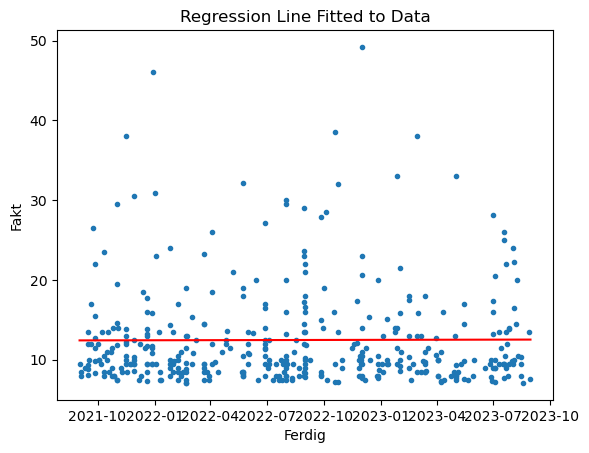

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib.dates import date2num

# Assuming anomalies_sorted is your DataFrame
anomalies_sorted['Ferdig_ordinal'] = anomalies_sorted['Ferdig'].apply(lambda x: date2num(x))

# Reshape data
X = anomalies_sorted['Ferdig_ordinal'].values.reshape(-1, 1)
y = anomalies_sorted['Fakt'].values

# Create a linear regression model
model = LinearRegression()

# Fit the model using your data
model.fit(X, y)

# Predict y-values
y_pred = model.predict(X)

# Plotting the original data points
plt.scatter(anomalies_sorted['Ferdig'], anomalies_sorted['Fakt'], marker='.')

# Plotting the regression line
plt.plot(anomalies_sorted['Ferdig'], y_pred, color='red')

# Adding labels and title for better understanding
plt.xlabel('Ferdig')
plt.ylabel('Fakt')
plt.title('Regression Line Fitted to Data')

# Displaying the plot
plt.show()


## Relativ frekvens


Scenario	Antall Vinnere	Relativ Frekvens (%)
1		0		0.00
11		1		9.09
21		3		14.29
31		1		3.23
41		8		19.51
51		7		13.73
62		8		12.90
72		13		18.06
82		16		19.51
92		12		13.04
102		16		15.69
113		23		20.35
123		20		16.26
133		19		14.29
143		23		16.08
153		26		16.99
163		22		13.50
174		29		16.67
184		46		25.00
194		29		14.95
204		30		14.71
214		46		21.50
225		27		12.00
235		40		17.02
245		55		22.45
255		33		12.94
265		39		14.72
275		47		17.09
286		63		22.03
296		45		15.20
306		43		14.05
316		53		16.77
326		55		16.87
337		69		20.47
347		60		17.29
357		48		13.45
367		61		16.62
377		56		14.85
387		60		15.50
398		77		19.35
408		77		18.87
418		62		14.83
428		80		18.69
438		79		18.04
449		82		18.26
459		85		18.52
469		84		17.91
479		75		15.66
489		71		14.52
500		73		14.60


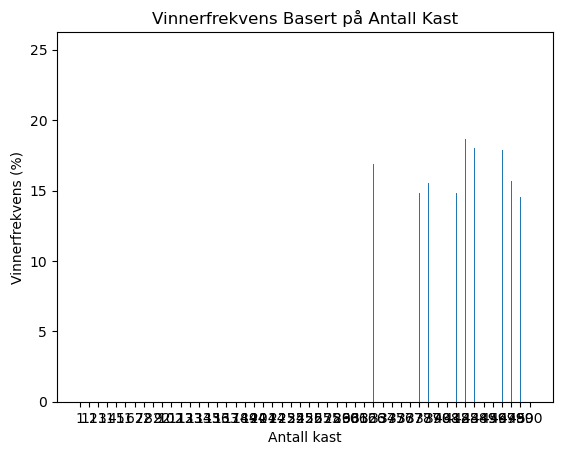

In [38]:
import matplotlib.pyplot as plt
import numpy as np

def simulate_dice_rolls(num_rolls):
    return np.random.choice([1,2,3,4,5,6], size=num_rolls).tolist().count(6)

def simulate_scenarios(scenarios):
    results = {}
    for scenario in scenarios:
        results[scenario] = simulate_dice_rolls(scenario)
    return results

def print_and_plot_results(results):
    print("Scenario\tAntall Vinnere\tRelativ Frekvens (%)")
    for key, value in results.items():
        print(f"{key}\t\t{value}\t\t{value / key * 100:.2f}")
        
    x = results.keys()
    y = [value / key * 100 for key, value in results.items()] 
    plt.bar(x, y)
    plt.xlabel('Antall kast')
    plt.ylabel('Vinnerfrekvens (%)')
    plt.title('Vinnerfrekvens Basert på Antall Kast')
    plt.xticks(list(x))
    plt.yticks(range(0, 30, 5))
    plt.show()

# Definer scenarier (antall kast)
scenarios = np.linspace(1, 500, 50, dtype=int)  # 50 scenarioer fra 1 til 500
results = simulate_scenarios(scenarios)

# Skriver ut og viser resultater
print_and_plot_results(results)


# Kategorisering av data 


### Kostand_stad_navn

In [19]:
# Last inn dataene dine i en DataFrame
df = pd.read_excel('Vaktutkallingar Frode.xlsx')
df

,hend_id,alvorlighetsgrad,bestillande_eining,dato,jobbliste_type,signatur,jobb_status,onska_ferdig_dato,prioritet,estimert_tid,...,sum_timar,fagomraade_kode,planlagt_ferdig_dato,driftsstans_j_n,ao_tekst,hendelse_tekst,hendelse_opphav,planansv_id,abc_indikator,anllin_id
0,672622,NaN,NaN,2021-01-01 09:25:51,1,ola,4,2021-01-01 09:25:44,3,4.0,...,1.5,2.0,2021-01-01 09:25:44,NaN,Får melding om at annlegget står i ein umulig ...,Får melding om at annlegget står i ein umulig ...,NaN,13795.0,1.0,NaN
1,672623,NaN,NaN,2021-01-01 10:53:44,1,ola,4,2021-01-01 10:53:35,3,4.0,...,3.5,2.0,2021-01-01 10:53:35,NaN,Vaier på opptrekk for tappeluke er nesten av,Vaier på opptrekk for tappeluke er nesten av,NaN,13794.0,3.0,NaN
2,672698,NaN,NaN,2021-01-02 05:54:55,1,esis,4,2021-01-02 05:54:47,3,3.0,...,2.1,2.0,2021-01-02 05:54:47,NaN,Alarm på lavt oljetrykk. Fleire kokiller gir n...,Alarm på lavt oljetrykk. Fleire kokiller gir n...,NaN,13794.0,3.0,NaN
3,672708,NaN,NaN,2021-01-02 11:48:47,1,ola,4,2021-01-02 11:48:39,3,4.0,...,3.9,2.0,2021-01-02 11:48:39,NaN,Oljepumpe kokillbord gir for lavt trykk,Oljepumpe kokillbord gir for lavt trykk,NaN,13794.0,1.0,NaN
4,672712,NaN,NaN,2021-01-02 17:24:33,1,a160334,4,2021-01-02 17:24:18,3,2.0,...,2.0,2.0,2021-01-02 17:24:18,NaN,Får ikke signal på at luke er igjen. Luke tar ...,Får ikke signal på at luke er igjen. Luke tar ...,NaN,13795.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,730810,NaN,NaN,2022-05-30 21:44:44,1,a224403,6,2022-05-30 21:44:21,3,NaN,...,NaN,2.0,2022-05-30 21:44:21,NaN,Lås på vogn går ikke opp ---> Dobbelbestillin...,Lås på vogn går ikke opp,NaN,13795.0,3.0,NaN
581,743028,NaN,NaN,2022-09-10 11:52:30,1,a162353,6,2022-09-10 11:51:35,3,NaN,...,NaN,5.0,2022-09-10 11:51:35,NaN,Mek.vakt. var allerede ute. Dør på varmekammer...,Mek.vakt. var allerede ute. Dør på varmekammer...,NaN,NaN,NaN,NaN
582,751453,NaN,NaN,2022-11-14 16:14:53,1,a150780,6,2022-11-14 16:14:34,3,NaN,...,NaN,2.0,2022-11-14 16:14:34,NaN,rotor/stator 2 er defekt.,rotor/stator 2 er defekt.,NaN,13794.0,3.0,NaN
583,765697,NaN,NaN,2023-03-11 17:06:03,1,a150780,6,2023-03-11 17:05:38,3,NaN,...,NaN,2.0,2023-03-11 17:05:38,NaN,Metall nede i rotor/labyrint på rotor 2. ---> ...,Metall nede i rotor/labyrint på rotor 2.,NaN,13794.0,3.0,NaN


objekt_navn
Sponpresse nr.5. sag 5.        49
Sag 6. Bandemaskin             42
Sag 5. Bandeautomat            26
Sponpresse nr.6. sag 6.        24
Rennefilter A. sir felles      24
                               ..
Kokilloljepumpe B.              1
Innkjøring av bolt til sag      1
Slaggbehandling felles          1
Slaggpresse Tardis Felles       1
Argon sentral m/røropplegg.     1
Length: 111, dtype: int64

******** kostand_stad_navn ***********
kostnad_stad_navn
Sag/pakking                   314
Støyping                      186
Konti homogenisering           50
Batch homogenisering           17
Slagganlegg, støyperi           9
Støypeovnar                     4
Støyperiproduksjon, felles      4
Kvalitetskontroll               1
dtype: int64


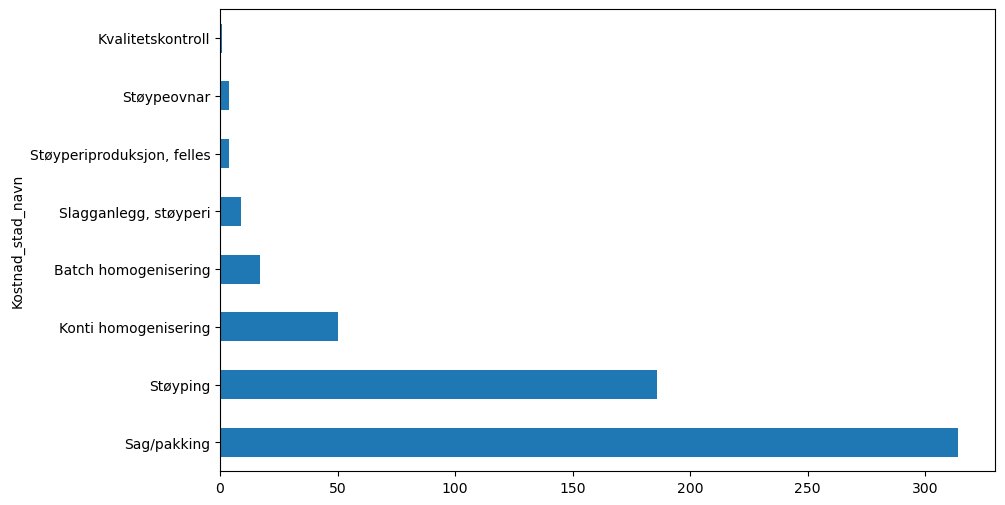

In [10]:

# Gruppere etter 'objekt_navn' og få gjennomsnittet for hver gruppe
gruppert_df = df.groupby('objekt_navn').size().sort_values(ascending=False)

print(gruppert_df)

gruppert_df = df.groupby('kostnad_stad_navn').size().sort_values(ascending=False)
print("\n******** kostand_stad_navn ***********")
print(gruppert_df)

df['kostnad_stad_navn'].value_counts().plot(kind='barh', figsize=(10,6), xlabel="Kostnad_stad_navn")
plt.show()


### ABS indicator

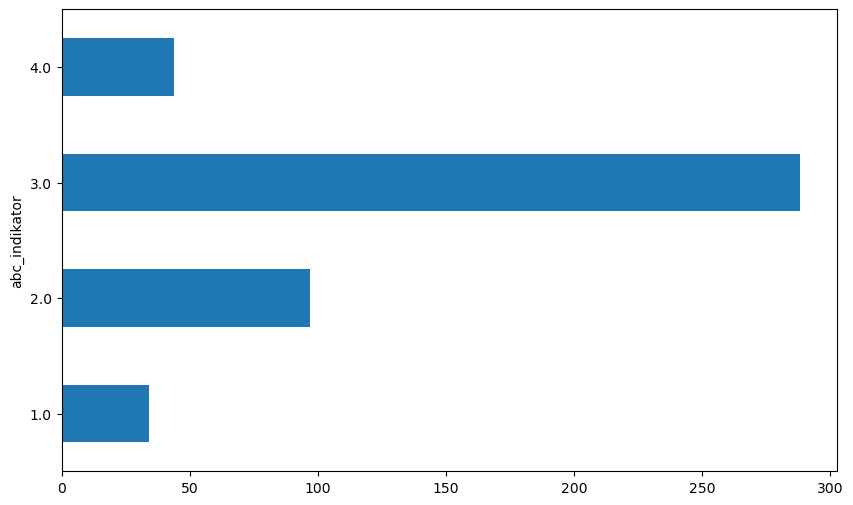

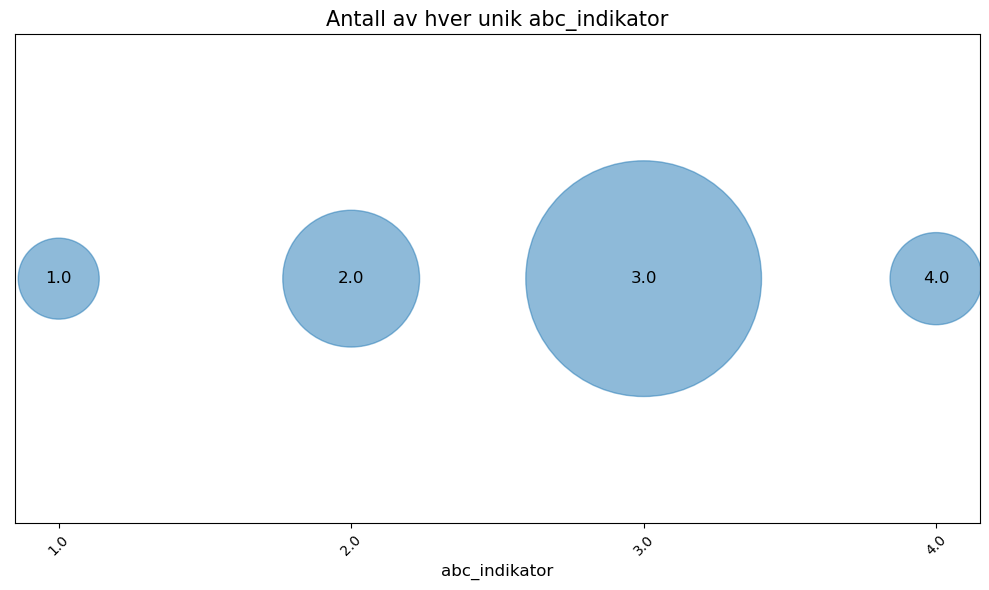

In [11]:

# kategoriser og plotte antall abs_indicator
df['abc_indikator'].value_counts().sort_index().plot(kind='barh', figsize=(10,6), xlabel="abc_indikator")
plt.show()

# Scatter plot

# Få verdikontoene for abc_indikator
abc_counts = df['abc_indikator'].value_counts().sort_index()
# X og Y koordinater (her, vi bare bruker 0 for Y siden vi ikke har en sekundær variabel)
x = range(len(abc_counts))
y = [0] * len(abc_counts)

# Størrelsen på boblene skal være proporsjonal med antall observasjoner
sizes = abc_counts.values * 100  # Multipliser med en konstant for å justere boblestørrelsen

plt.figure(figsize=(10, 6))

# Lager scatterplott
plt.scatter(x, y, s=sizes, alpha=0.5)

# Annoter boblene med de korresponderende etikettene
for i, txt in enumerate(abc_counts.index):
    plt.annotate(txt, (x[i], y[i]), ha='center', va='center', fontsize=12, color='black')

# Fjern y-aksen ettersom den ikke representerer noe i dette tilfellet
plt.yticks([])

# Sett x-aksen etiketter som abc_indikator verdiene
plt.xticks(x, abc_counts.index, rotation=45)

# Sett titler og etiketter
plt.title('Antall av hver unik abc_indikator', fontsize=15)
plt.xlabel('abc_indikator', fontsize=12)

# Vis plottet
plt.tight_layout()
plt.show()



### Signatur

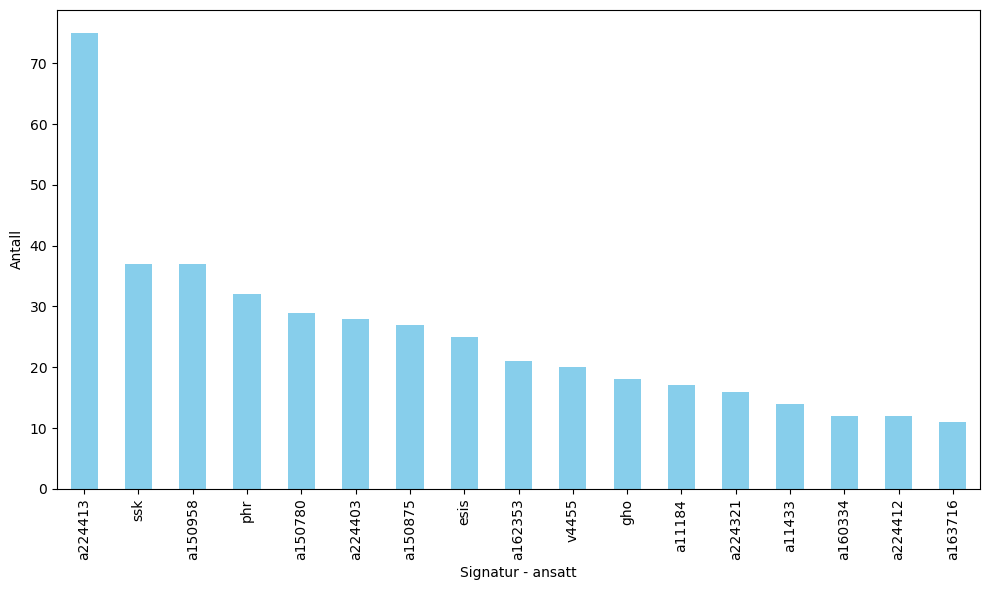

In [68]:

# Få antall unike signaturer
signatur_counts = df['signatur'].value_counts()

# Filtrer signaturene som har mer enn "antall_signatur" 
# Du kan selv endre på antall_signatur for å excludere de so mhar få
antall_signatur = 10
filtered_signatur_counts = signatur_counts[signatur_counts > antall_signatur]

# Lage bar-plot
filtered_signatur_counts.plot(kind='bar', figsize=(10,6), xlabel="Signatur - ansatt", ylabel="Antall", color='skyblue')

# Vis plottet
plt.tight_layout()
plt.show()


Antall jobber per time

0     18
1     29
2     25
3     25
4     31
5     33
6      9
7     10
8     11
9     15
10    16
11    10
12     8
13    15
14     5
15    26
16    41
17    39
18    39
19    38
20    33
21    40
22    44
23    25
Name: time, dtype: int64


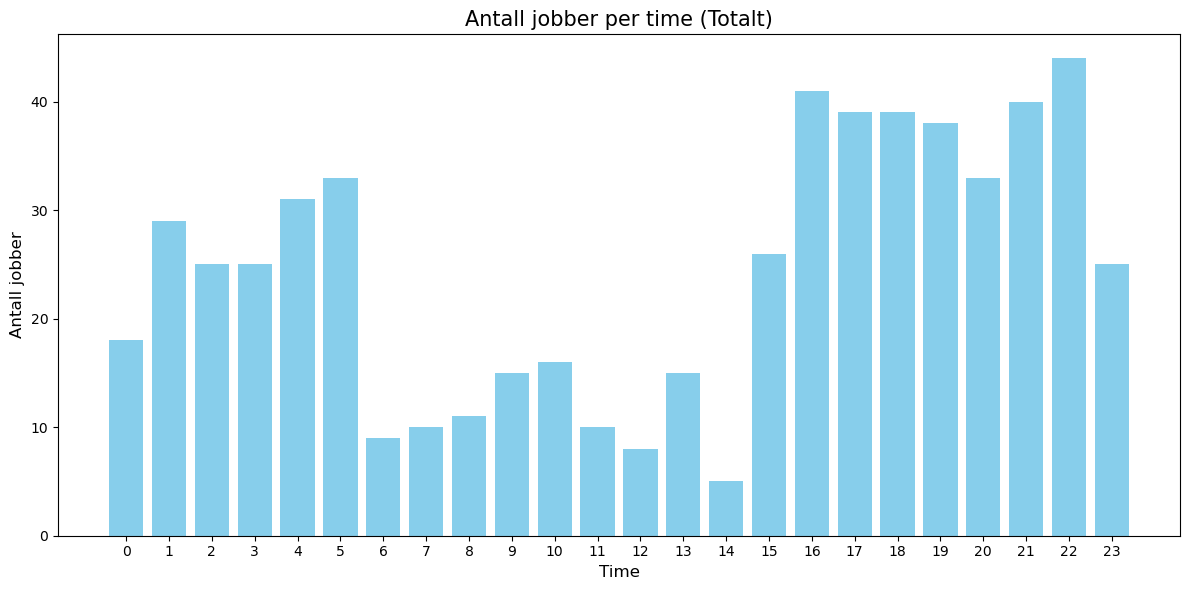

In [18]:
# Filtrer datasettet for den spesifikke ansatte
ansatt_df = df[df['signatur'] == 'a224413']

ansatt_df = df # Kan gruppere vaktutkallinger for hele datasettet
# Konverter dato kolonnen til datetime objekt hvis den ikke allerede er
ansatt_df['dato'] = pd.to_datetime(ansatt_df['dato'])

# Ekstraher timen og kategoriser i tidsrom
ansatt_df['time'] = ansatt_df['dato'].dt.hour

# Telle antall jobber i hver time
time_counts = ansatt_df['time'].value_counts()

# Sortere resultatet for bedre visning
time_counts = time_counts.sort_index()

# Printe resultatet
print(time_counts)

# Lage bar-plot
plt.figure(figsize=(12, 6))
plt.bar(time_counts.index, time_counts.values, color='skyblue')

# Legge til titler og etiketter
plt.title('Antall jobber per time (Totalt)', fontsize=15)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Antall jobber', fontsize=12)
plt.xticks(range(24))  # Setter x-aksen ticks til hver time

# Vis plottet
plt.tight_layout()
plt.show()

# Dataforberedelse
Dataforberedelse er prosessen med å rense, strukturere og berike rådata til et ønsket format for bedre beslutningsstaking og analyse. Det er en kritisk trinn i datanalyseprosessen, da kvaliteten på data påvirker kvaliteten på innsiktene som kan oppnås.

In [54]:
df = pd.read_excel('Vaktutkallingar Frode.xlsx')
# vår data
df

,hend_id,alvorlighetsgrad,bestillande_eining,dato,jobbliste_type,signatur,jobb_status,onska_ferdig_dato,prioritet,estimert_tid,...,sum_timar,fagomraade_kode,planlagt_ferdig_dato,driftsstans_j_n,ao_tekst,hendelse_tekst,hendelse_opphav,planansv_id,abc_indikator,anllin_id
0,672622,NaN,NaN,2021-01-01 09:25:51,1,ola,4,2021-01-01 09:25:44,3,4.0,...,1.5,2.0,2021-01-01 09:25:44,NaN,Får melding om at annlegget står i ein umulig posisjon for resetting,Får melding om at annlegget står i ein umulig posisjon for resetting,NaN,13795.0,1.0,NaN
1,672623,NaN,NaN,2021-01-01 10:53:44,1,ola,4,2021-01-01 10:53:35,3,4.0,...,3.5,2.0,2021-01-01 10:53:35,NaN,Vaier på opptrekk for tappeluke er nesten av,Vaier på opptrekk for tappeluke er nesten av,NaN,13794.0,3.0,NaN
2,672698,NaN,NaN,2021-01-02 05:54:55,1,esis,4,2021-01-02 05:54:47,3,3.0,...,2.1,2.0,2021-01-02 05:54:47,NaN,Alarm på lavt oljetrykk. Fleire kokiller gir nesten ikkje olje.,Alarm på lavt oljetrykk. Fleire kokiller gir nesten ikkje olje.,NaN,13794.0,3.0,NaN
3,672708,NaN,NaN,2021-01-02 11:48:47,1,ola,4,2021-01-02 11:48:39,3,4.0,...,3.9,2.0,2021-01-02 11:48:39,NaN,Oljepumpe kokillbord gir for lavt trykk,Oljepumpe kokillbord gir for lavt trykk,NaN,13794.0,1.0,NaN
4,672712,NaN,NaN,2021-01-02 17:24:33,1,a160334,4,2021-01-02 17:24:18,3,2.0,...,2.0,2.0,2021-01-02 17:24:18,NaN,Får ikke signal på at luke er igjen. Luke tar borti på vei ned,Får ikke signal på at luke er igjen. Luke tar borti på vei ned,NaN,13795.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,730810,NaN,NaN,2022-05-30 21:44:44,1,a224403,6,2022-05-30 21:44:21,3,NaN,...,NaN,2.0,2022-05-30 21:44:21,NaN,"Lås på vogn går ikke opp ---> Dobbelbestilling, avvist",Lås på vogn går ikke opp,NaN,13795.0,3.0,NaN
581,743028,NaN,NaN,2022-09-10 11:52:30,1,a162353,6,2022-09-10 11:51:35,3,NaN,...,NaN,5.0,2022-09-10 11:51:35,NaN,Mek.vakt. var allerede ute. Dør på varmekammer 1 har dratt kabel skeivt og dør har gått skeivt. ---> dobbelbestilling. AOnr: 762542,Mek.vakt. var allerede ute. Dør på varmekammer 1 har dratt kabel skeivt og dør har gått skeivt.,NaN,NaN,NaN,NaN
582,751453,NaN,NaN,2022-11-14 16:14:53,1,a150780,6,2022-11-14 16:14:34,3,NaN,...,NaN,2.0,2022-11-14 16:14:34,NaN,rotor/stator 2 er defekt.,rotor/stator 2 er defekt.,NaN,13794.0,3.0,NaN
583,765697,NaN,NaN,2023-03-11 17:06:03,1,a150780,6,2023-03-11 17:05:38,3,NaN,...,NaN,2.0,2023-03-11 17:05:38,NaN,Metall nede i rotor/labyrint på rotor 2. ---> dobbelbestilling,Metall nede i rotor/labyrint på rotor 2.,NaN,13794.0,3.0,NaN


## Data Rensing
Vi kan tenke oss at sum_timar og fagomraade_kode er relevante for oss for vår analyse. Først kan vi fjerne alle rader med NaN-verdier i relevante kolonner: 

In [28]:
# 
df = pd.read_excel('Vaktutkallingar Frode.xlsx')

# Få de ekskluderte radene
ekskludert_df = df[df['sum_timar'].isna() | df['fagomraade_kode'].isna()]

antall_rader_org = len(df)
# Print ut de ekskluderte dataene
ekskludert_df[['hend_id','sum_timar', 'fagomraade_kode']]


,hend_id,sum_timar,fagomraade_kode
26,678258,3.0,NaN
107,695290,2.0,NaN
177,707235,NaN,2.0
227,716822,9.0,NaN
231,717099,5.0,NaN
255,720518,3.5,NaN
261,721600,23.3,NaN
263,722019,2.0,NaN
264,722032,1.0,NaN
272,723392,5.5,NaN


In [29]:
# Fjern NaN-verdiene fra den opprinnelige df

df.dropna(subset=['sum_timar', 'fagomraade_kode'], inplace=True)
print("Antall rader som vi ekskluderer: ", antall_rader_org - len(df))
df

Antall rader som vi ekskluderer:  33


,hend_id,alvorlighetsgrad,bestillande_eining,dato,jobbliste_type,signatur,jobb_status,onska_ferdig_dato,prioritet,estimert_tid,...,sum_timar,fagomraade_kode,planlagt_ferdig_dato,driftsstans_j_n,ao_tekst,hendelse_tekst,hendelse_opphav,planansv_id,abc_indikator,anllin_id
0,672622,NaN,NaN,2021-01-01 09:25:51,1,ola,4,2021-01-01 09:25:44,3,4.0,...,1.5,2.0,2021-01-01 09:25:44,NaN,Får melding om at annlegget står i ein umulig ...,Får melding om at annlegget står i ein umulig ...,NaN,13795.0,1.0,NaN
1,672623,NaN,NaN,2021-01-01 10:53:44,1,ola,4,2021-01-01 10:53:35,3,4.0,...,3.5,2.0,2021-01-01 10:53:35,NaN,Vaier på opptrekk for tappeluke er nesten av,Vaier på opptrekk for tappeluke er nesten av,NaN,13794.0,3.0,NaN
2,672698,NaN,NaN,2021-01-02 05:54:55,1,esis,4,2021-01-02 05:54:47,3,3.0,...,2.1,2.0,2021-01-02 05:54:47,NaN,Alarm på lavt oljetrykk. Fleire kokiller gir n...,Alarm på lavt oljetrykk. Fleire kokiller gir n...,NaN,13794.0,3.0,NaN
3,672708,NaN,NaN,2021-01-02 11:48:47,1,ola,4,2021-01-02 11:48:39,3,4.0,...,3.9,2.0,2021-01-02 11:48:39,NaN,Oljepumpe kokillbord gir for lavt trykk,Oljepumpe kokillbord gir for lavt trykk,NaN,13794.0,1.0,NaN
4,672712,NaN,NaN,2021-01-02 17:24:33,1,a160334,4,2021-01-02 17:24:18,3,2.0,...,2.0,2.0,2021-01-02 17:24:18,NaN,Får ikke signal på at luke er igjen. Luke tar ...,Får ikke signal på at luke er igjen. Luke tar ...,NaN,13795.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,789397,NaN,NaN,2023-10-01 20:27:48,1,a811838,4,2023-10-01 20:27:33,3,2.0,...,2.0,2.0,2023-10-01 20:27:33,NaN,Briketter kjilt fast i utløp for briketter. Må...,Briketter kjilt fast i utløp for briketter. Må...,NaN,13797.0,3.0,NaN
571,790361,NaN,NaN,2023-10-10 02:33:34,1,a224403,4,2023-10-10 02:33:14,3,2.0,...,2.0,2.0,2023-10-10 02:33:14,NaN,Trykk ejektor,Trykk ejektor,NaN,13794.0,3.0,NaN
572,790594,NaN,NaN,2023-10-11 17:45:36,1,a811838,4,2023-10-11 17:45:19,3,5.0,...,4.0,2.0,2023-10-11 17:45:19,NaN,"Rotor, stator og drift kammer 2 må skiftes ut","Rotor, stator og drift kammer 2 må skiftes ut",NaN,13794.0,3.0,NaN
573,790596,NaN,NaN,2023-10-11 20:31:06,1,a811838,4,2023-10-11 20:30:53,3,10.0,...,15.0,2.0,2023-10-11 20:30:53,NaN,"Diverse opprydning A-senter. Rensk av metall, ...","Diverse opprydning A-senter. Rensk av metall, ...",NaN,13794.0,1.0,NaN


## Datatransformasjon:

Konvertere 'dato' kolonnen til en faktisk datotype (hvis den ikke allerede er det):

In [30]:
df['dato'] = pd.to_datetime(df['dato'])
df

,hend_id,alvorlighetsgrad,bestillande_eining,dato,jobbliste_type,signatur,jobb_status,onska_ferdig_dato,prioritet,estimert_tid,...,sum_timar,fagomraade_kode,planlagt_ferdig_dato,driftsstans_j_n,ao_tekst,hendelse_tekst,hendelse_opphav,planansv_id,abc_indikator,anllin_id
0,672622,NaN,NaN,2021-01-01 09:25:51,1,ola,4,2021-01-01 09:25:44,3,4.0,...,1.5,2.0,2021-01-01 09:25:44,NaN,Får melding om at annlegget står i ein umulig ...,Får melding om at annlegget står i ein umulig ...,NaN,13795.0,1.0,NaN
1,672623,NaN,NaN,2021-01-01 10:53:44,1,ola,4,2021-01-01 10:53:35,3,4.0,...,3.5,2.0,2021-01-01 10:53:35,NaN,Vaier på opptrekk for tappeluke er nesten av,Vaier på opptrekk for tappeluke er nesten av,NaN,13794.0,3.0,NaN
2,672698,NaN,NaN,2021-01-02 05:54:55,1,esis,4,2021-01-02 05:54:47,3,3.0,...,2.1,2.0,2021-01-02 05:54:47,NaN,Alarm på lavt oljetrykk. Fleire kokiller gir n...,Alarm på lavt oljetrykk. Fleire kokiller gir n...,NaN,13794.0,3.0,NaN
3,672708,NaN,NaN,2021-01-02 11:48:47,1,ola,4,2021-01-02 11:48:39,3,4.0,...,3.9,2.0,2021-01-02 11:48:39,NaN,Oljepumpe kokillbord gir for lavt trykk,Oljepumpe kokillbord gir for lavt trykk,NaN,13794.0,1.0,NaN
4,672712,NaN,NaN,2021-01-02 17:24:33,1,a160334,4,2021-01-02 17:24:18,3,2.0,...,2.0,2.0,2021-01-02 17:24:18,NaN,Får ikke signal på at luke er igjen. Luke tar ...,Får ikke signal på at luke er igjen. Luke tar ...,NaN,13795.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,789397,NaN,NaN,2023-10-01 20:27:48,1,a811838,4,2023-10-01 20:27:33,3,2.0,...,2.0,2.0,2023-10-01 20:27:33,NaN,Briketter kjilt fast i utløp for briketter. Må...,Briketter kjilt fast i utløp for briketter. Må...,NaN,13797.0,3.0,NaN
571,790361,NaN,NaN,2023-10-10 02:33:34,1,a224403,4,2023-10-10 02:33:14,3,2.0,...,2.0,2.0,2023-10-10 02:33:14,NaN,Trykk ejektor,Trykk ejektor,NaN,13794.0,3.0,NaN
572,790594,NaN,NaN,2023-10-11 17:45:36,1,a811838,4,2023-10-11 17:45:19,3,5.0,...,4.0,2.0,2023-10-11 17:45:19,NaN,"Rotor, stator og drift kammer 2 må skiftes ut","Rotor, stator og drift kammer 2 må skiftes ut",NaN,13794.0,3.0,NaN
573,790596,NaN,NaN,2023-10-11 20:31:06,1,a811838,4,2023-10-11 20:30:53,3,10.0,...,15.0,2.0,2023-10-11 20:30:53,NaN,"Diverse opprydning A-senter. Rensk av metall, ...","Diverse opprydning A-senter. Rensk av metall, ...",NaN,13794.0,1.0,NaN


## Datautvinning:

La oss anta at vi vil kombinere data fra "ao_tekst" og "hendelse_tekst" for å lage en ny kolonne "beskrivelse":

In [42]:
pd.set_option('display.max_colwidth', None)
df['beskrivelse'] = "[" +df['objekt_navn'] + "] " + df['ao_tekst'] + " - " + df['hendelse_tekst'] + " - Hilsen " +df['signatur'] 
df[['beskrivelse', 'ao_tekst', 'hendelse_tekst']]


,beskrivelse,ao_tekst,hendelse_tekst
0,[Hydraulikk/pneumatikk felles Konti 2] Får melding om at annlegget står i ein umulig posisjon for resetting - Får melding om at annlegget står i ein umulig posisjon for resetting - Hilsen ola,Får melding om at annlegget står i ein umulig posisjon for resetting,Får melding om at annlegget står i ein umulig posisjon for resetting
1,[Ovnsluker/dører m/betjening.] Vaier på opptrekk for tappeluke er nesten av - Vaier på opptrekk for tappeluke er nesten av - Hilsen ola,Vaier på opptrekk for tappeluke er nesten av,Vaier på opptrekk for tappeluke er nesten av
2,[Kokilloljepumpe B.] Alarm på lavt oljetrykk. Fleire kokiller gir nesten ikkje olje. - Alarm på lavt oljetrykk. Fleire kokiller gir nesten ikkje olje. - Hilsen esis,Alarm på lavt oljetrykk. Fleire kokiller gir nesten ikkje olje.,Alarm på lavt oljetrykk. Fleire kokiller gir nesten ikkje olje.
3,"[Støpemaskin B felles, div.] Oljepumpe kokillbord gir for lavt trykk - Oljepumpe kokillbord gir for lavt trykk - Hilsen ola",Oljepumpe kokillbord gir for lavt trykk,Oljepumpe kokillbord gir for lavt trykk
4,[Luftkjøler 2 Konti 2] Får ikke signal på at luke er igjen. Luke tar borti på vei ned - Får ikke signal på at luke er igjen. Luke tar borti på vei ned - Hilsen a160334,Får ikke signal på at luke er igjen. Luke tar borti på vei ned,Får ikke signal på at luke er igjen. Luke tar borti på vei ned
...,...,...,...
570,[Sponpresse nr.5. sag 5.] Briketter kjilt fast i utløp for briketter. Må åpne opp for å få laust briketter og reingjering - Briketter kjilt fast i utløp for briketter. Må åpne opp for å få laust briketter og reingjering - Hilsen a811838,Briketter kjilt fast i utløp for briketter. Må åpne opp for å få laust briketter og reingjering,Briketter kjilt fast i utløp for briketter. Må åpne opp for å få laust briketter og reingjering
571,[Rennefilter B. sir felles] Trykk ejektor - Trykk ejektor - Hilsen a224403,Trykk ejektor,Trykk ejektor
572,"[Rennefilter B. sir felles] Rotor, stator og drift kammer 2 må skiftes ut - Rotor, stator og drift kammer 2 må skiftes ut - Hilsen a811838","Rotor, stator og drift kammer 2 må skiftes ut","Rotor, stator og drift kammer 2 må skiftes ut"
573,"[Støpemaskin A felles, div.] Diverse opprydning A-senter. Rensk av metall, og frigjering av tobbevogn. - Diverse opprydning A-senter. Rensk av metall, og frigjering av tobbevogn. - Hilsen a811838","Diverse opprydning A-senter. Rensk av metall, og frigjering av tobbevogn.","Diverse opprydning A-senter. Rensk av metall, og frigjering av tobbevogn."


# Dataanrikning:

Anta at vi vil legge til en ny kolonne som indikerer om en hendelse skjedde i helgen eller ikke:

In [46]:
mandag = 0
tirsdag = 1
onsdag = 2
torsdag = 3
fredag = 4
lørdag = 5
søndag = 6
df['helg'] = df['dato'].dt.weekday >= lørdag

df[df['helg'] == True][['hend_id','objekt_navn','dato', 'helg']]


,hend_id,objekt_navn,dato,helg
2,672698,Kokilloljepumpe B.,2021-01-02 05:54:55,True
3,672708,"Støpemaskin B felles, div.",2021-01-02 11:48:47,True
4,672712,Luftkjøler 2 Konti 2,2021-01-02 17:24:33,True
5,672802,Sponpresse nr.6. sag 6.,2021-01-03 18:30:12,True
8,675024,Homog.ovn 2,2021-01-23 04:58:59,True
...,...,...,...,...
565,788401,"Støpemaskin A felles, div.",2023-09-23 08:54:46,True
566,788534,Signode AK 200 HD Nr.3,2023-09-24 19:45:05,True
568,789277,Sag 5. Bandeautomat,2023-10-01 02:48:20,True
569,789371,Rennefilter B. sir felles,2023-10-01 04:26:34,True


### Antall utkallinger for hver ukedag

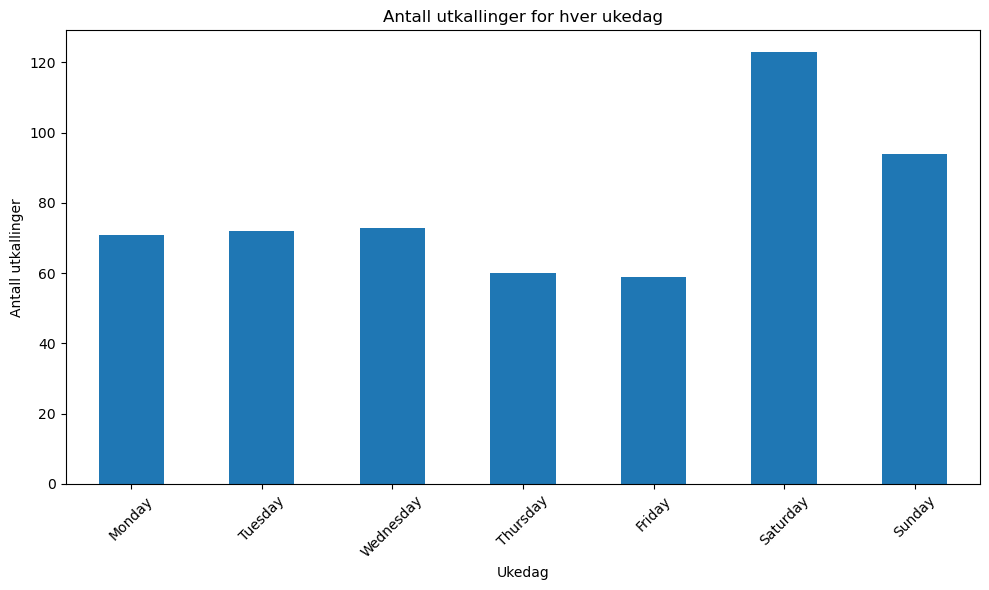

In [53]:

df['dato'] = pd.to_datetime(df['dato'])

df['weekday'] = df['dato'].dt.day_name()

job_counts = df['weekday'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Creating a bar plot
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar')
plt.title('Antall utkallinger for hver ukedag')
plt.xlabel('Ukedag')
plt.ylabel('Antall utkallinger')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Datafiltrering:

Hvis vi bare er interessert i hendelser der "jobb_status" er 4 og "prioritet" er 3, kan vi filtrere vår dataframe:

In [85]:
df_filtered = df[(df['jobb_status'] == 4) & (df['prioritet'] == 3)]

df_filtered

,hend_id,alvorlighetsgrad,bestillande_eining,dato,jobbliste_type,signatur,jobb_status,onska_ferdig_dato,prioritet,estimert_tid,...,planlagt_ferdig_dato,driftsstans_j_n,ao_tekst,hendelse_tekst,hendelse_opphav,planansv_id,abc_indikator,anllin_id,beskrivelse,helg
0,672622,NaN,NaN,2021-01-01 09:25:51,1,ola,4,2021-01-01 09:25:44,3,4.0,...,2021-01-01 09:25:44,NaN,Får melding om at annlegget står i ein umulig ...,Får melding om at annlegget står i ein umulig ...,NaN,13795.0,1.0,NaN,Får melding om at annlegget står i ein umulig ...,False
1,672623,NaN,NaN,2021-01-01 10:53:44,1,ola,4,2021-01-01 10:53:35,3,4.0,...,2021-01-01 10:53:35,NaN,Vaier på opptrekk for tappeluke er nesten av,Vaier på opptrekk for tappeluke er nesten av,NaN,13794.0,3.0,NaN,Vaier på opptrekk for tappeluke er nesten av -...,False
2,672698,NaN,NaN,2021-01-02 05:54:55,1,esis,4,2021-01-02 05:54:47,3,3.0,...,2021-01-02 05:54:47,NaN,Alarm på lavt oljetrykk. Fleire kokiller gir n...,Alarm på lavt oljetrykk. Fleire kokiller gir n...,NaN,13794.0,3.0,NaN,Alarm på lavt oljetrykk. Fleire kokiller gir n...,True
3,672708,NaN,NaN,2021-01-02 11:48:47,1,ola,4,2021-01-02 11:48:39,3,4.0,...,2021-01-02 11:48:39,NaN,Oljepumpe kokillbord gir for lavt trykk,Oljepumpe kokillbord gir for lavt trykk,NaN,13794.0,1.0,NaN,Oljepumpe kokillbord gir for lavt trykk - Olje...,True
4,672712,NaN,NaN,2021-01-02 17:24:33,1,a160334,4,2021-01-02 17:24:18,3,2.0,...,2021-01-02 17:24:18,NaN,Får ikke signal på at luke er igjen. Luke tar ...,Får ikke signal på at luke er igjen. Luke tar ...,NaN,13795.0,3.0,NaN,Får ikke signal på at luke er igjen. Luke tar ...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,789371,NaN,NaN,2023-10-01 04:26:34,1,a811838,4,2023-10-01 04:26:10,3,4.0,...,2023-10-01 04:26:10,NaN,Rotor har størknet fast og må meisles vekk. By...,Rotor har størknet fast og må meisles vekk. By...,NaN,13794.0,3.0,NaN,Rotor har størknet fast og må meisles vekk. By...,True
570,789397,NaN,NaN,2023-10-01 20:27:48,1,a811838,4,2023-10-01 20:27:33,3,2.0,...,2023-10-01 20:27:33,NaN,Briketter kjilt fast i utløp for briketter. Må...,Briketter kjilt fast i utløp for briketter. Må...,NaN,13797.0,3.0,NaN,Briketter kjilt fast i utløp for briketter. Må...,True
571,790361,NaN,NaN,2023-10-10 02:33:34,1,a224403,4,2023-10-10 02:33:14,3,2.0,...,2023-10-10 02:33:14,NaN,Trykk ejektor,Trykk ejektor,NaN,13794.0,3.0,NaN,Trykk ejektor - Trykk ejektor,False
572,790594,NaN,NaN,2023-10-11 17:45:36,1,a811838,4,2023-10-11 17:45:19,3,5.0,...,2023-10-11 17:45:19,NaN,"Rotor, stator og drift kammer 2 må skiftes ut","Rotor, stator og drift kammer 2 må skiftes ut",NaN,13794.0,3.0,NaN,"Rotor, stator og drift kammer 2 må skiftes ut ...",False


Når dataforberedelsen er ferdig, kan du utføre din analyse på den forberedte dataen.

For vårt mål:

In [86]:
resultat = df_filtered.groupby('fagomraade_kode')['sum_timar'].sum()
print(resultat)


fagomraade_kode
1.0      21.000
2.0    2900.501
5.0      19.000
Name: sum_timar, dtype: float64
